# Objective
Provide basic clustering and analysis for an SNR test image with the following properties:

- Number of spots: 50
- Spot shape: 2D Gaussian (sigma = 1.75 pixels)
- SNR distribution: Gaussian (mu = 20, sigma = 20)
- Background image: MAX_ISP_300_1.tif (mouse lung)
- Spot image generated 20180713
- Sent for annotation 20180716
- Annotations received 20180718

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation
worker_marker_size = 8
cluster_marker_size = 40
bigger_window_size = True

In [2]:
json_filename = 'SNR_test.json'
img_filename = 'MAX_ISP_300_1_nspots50_spot_sig1.75_snr20_20_spot_img.png'
csv_filename = 'MAX_ISP_300_1_nspots50_spot_sig1.75_snr20_20_coord_snr_list.csv'

### Load data, get the dataframe 

In [3]:
ba = QuantiusAnnotation(json_filename)
sa = SpotAnnotationAnalysis(ba)
anno_all = ba.df()

# Overview of Annotations 
#### Worker annotations only

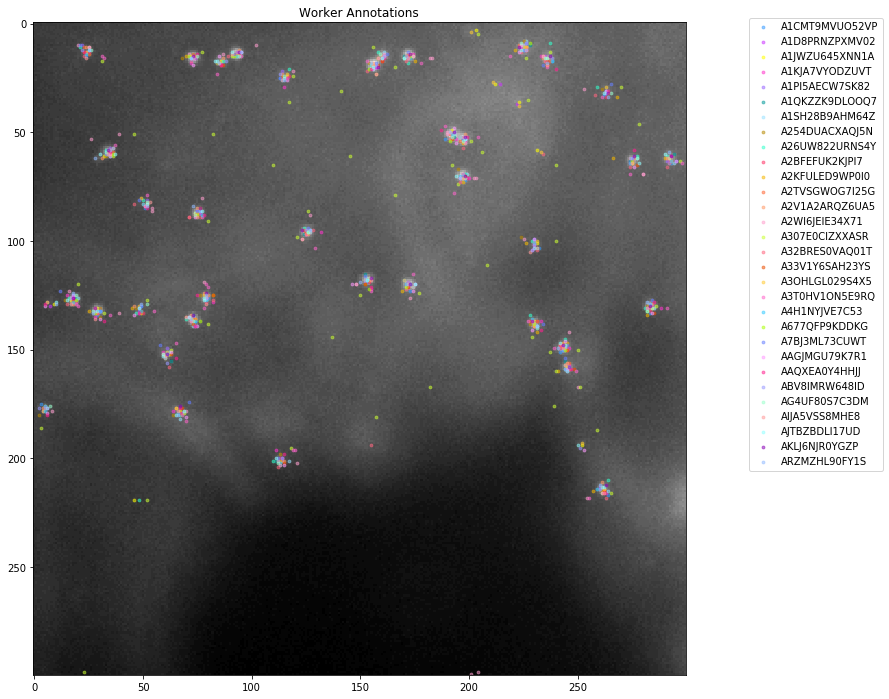

In [4]:
show_ref_points = False
show_workers = True
show_clusters = False
clustering_params = None
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### Show reference points (big yellow dots)

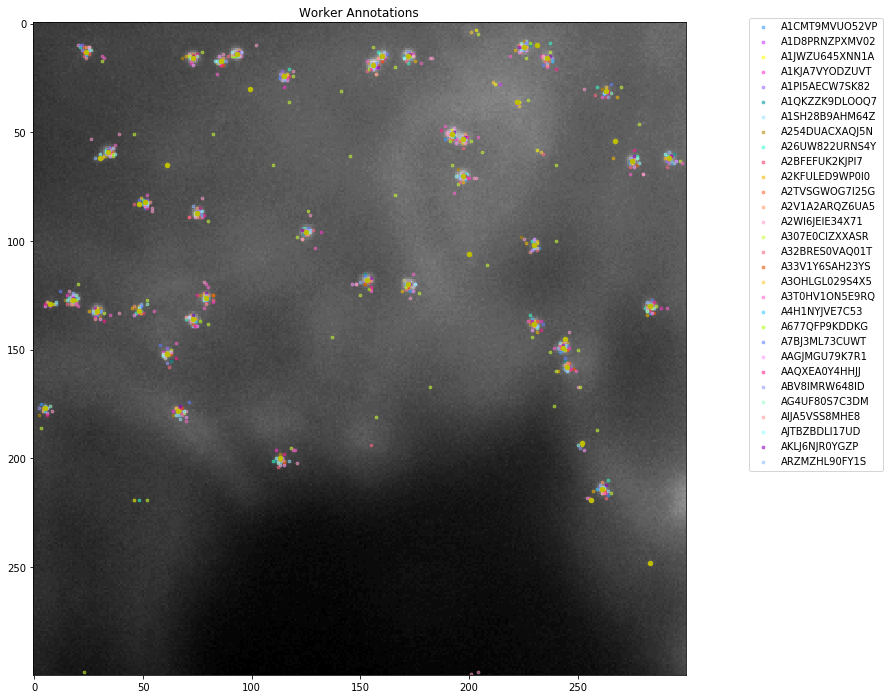

In [5]:
show_ref_points = True
show_workers = True
show_clusters = False
clustering_params = None
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### Worker annotations with cluster centroids

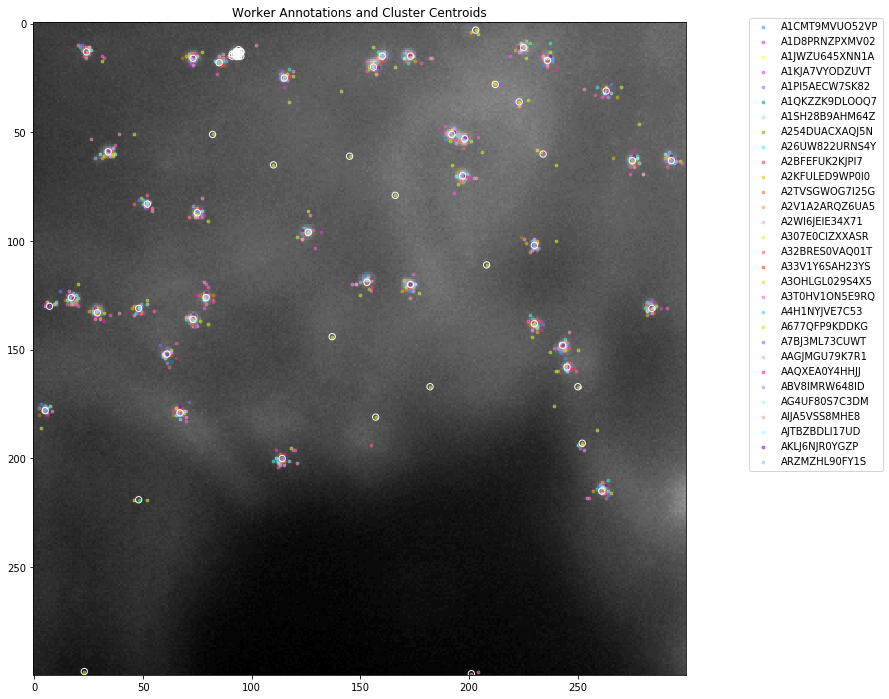

In [6]:
show_ref_points = False
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### correctness_threshold = 4, 10, 20

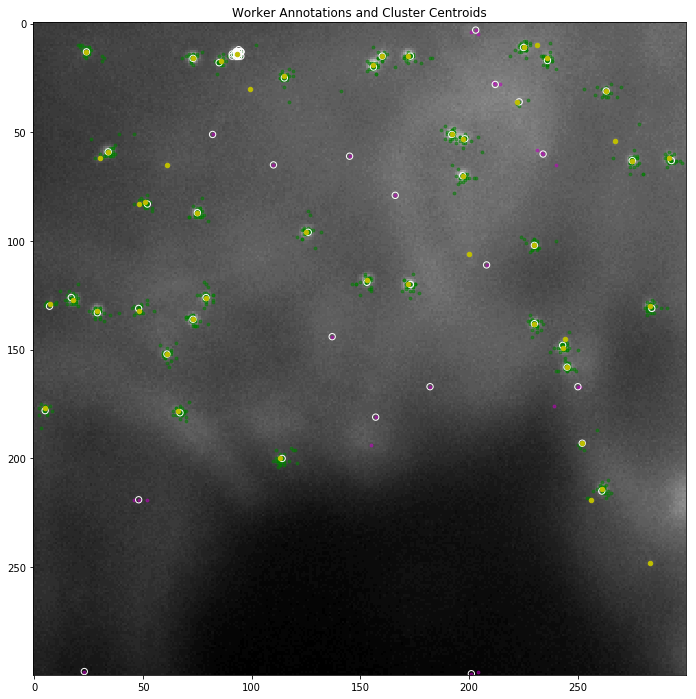

In [7]:
show_ref_points = True
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = True
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = 4

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

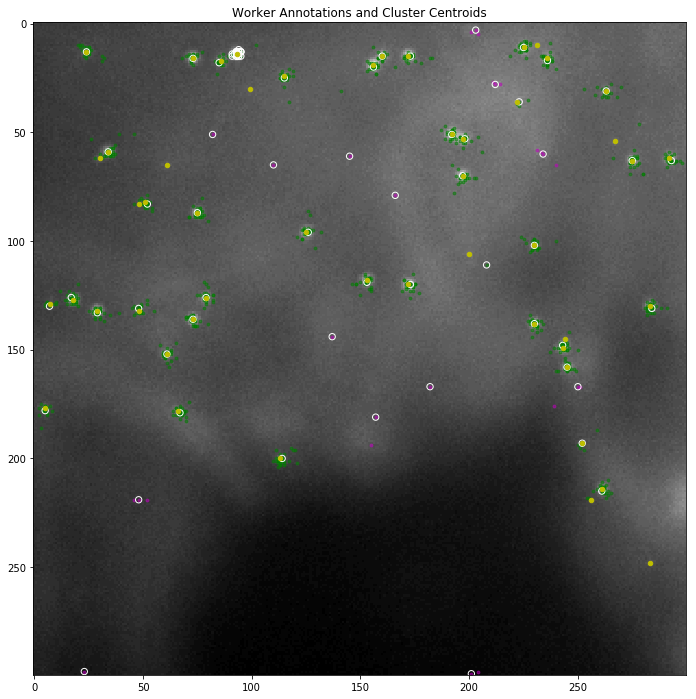

In [8]:
show_ref_points = True
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = True
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = 10

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

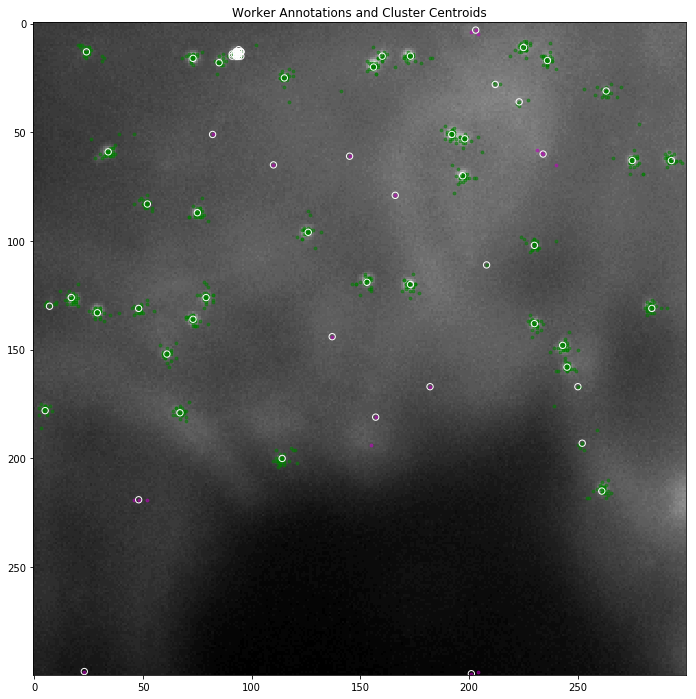

In [9]:
show_ref_points = False
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = True
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = 20

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### Example 3.2
Show reference points with cluster correctness.

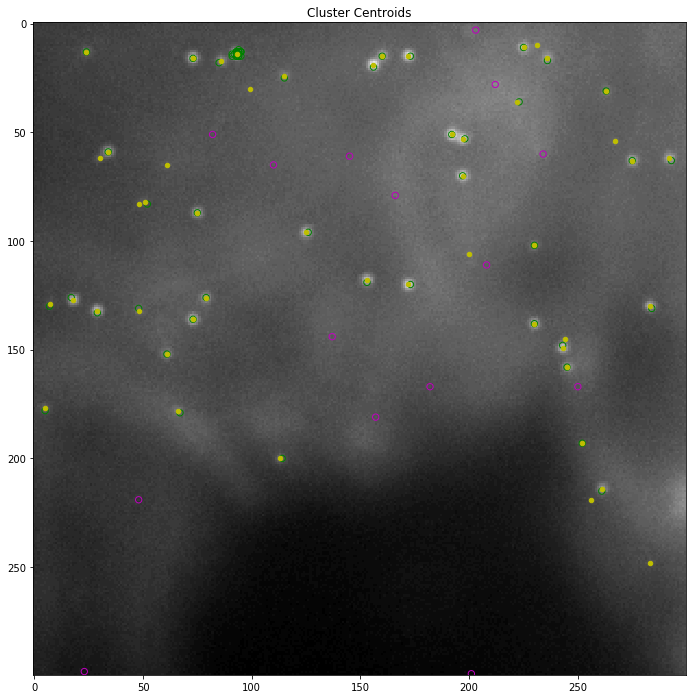

In [10]:
show_ref_points = True
show_workers = False
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = False
show_correctness_clusters = True
show_NN_inc = False
correctness_threshold = 4

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### Example 3.3
For all incorrect clusters, show the nearest neighbor in the same color. (Primary usefulness for now is debugging.)

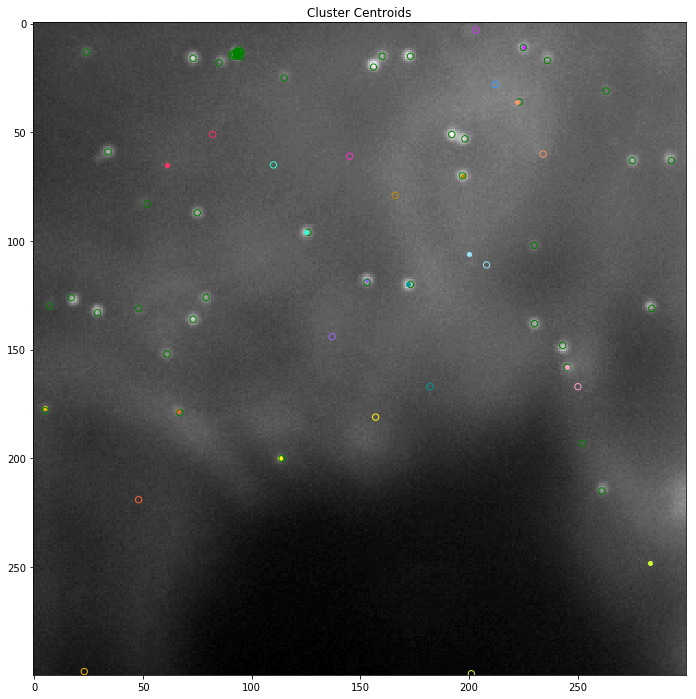

In [11]:
show_ref_points = False
show_workers = False
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = False
show_correctness_clusters = True
show_NN_inc = True
correctness_threshold = 4

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

### Note: Optimizing parameters.
The architecture of this method makes it easy to toggle and identify optimal quantities such as clustering parameters. The above clusters were generated with -350 as the preference parameter for AffinityPropagation. I was originally clustering with -100 as the preference parameter, and realized that centroids plotted in plot_annotations were showing up in places where there were no annotations at all.

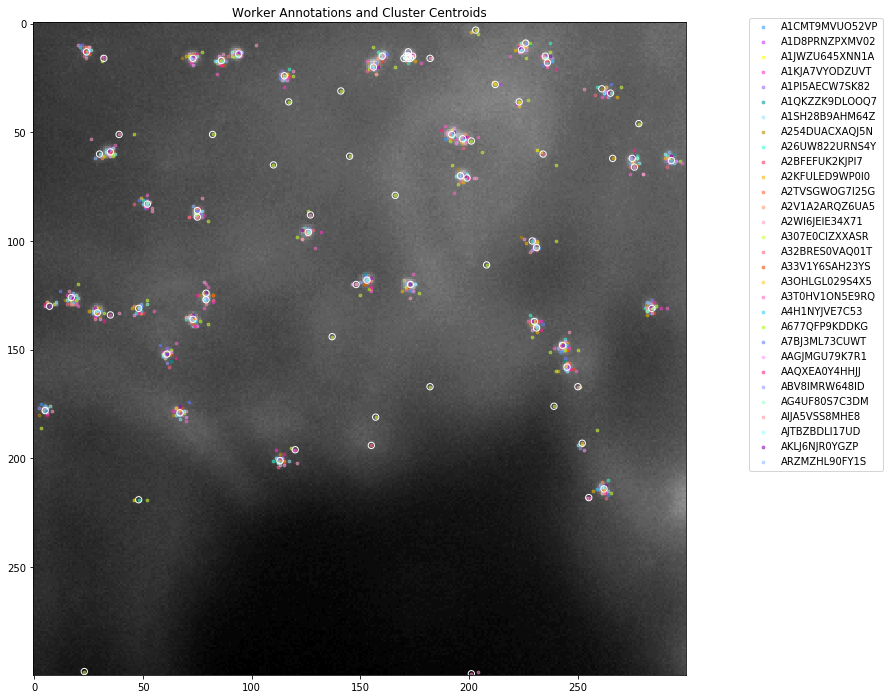

In [12]:
show_ref_points = False
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -100]
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

So I adjusted the clustering paramenter from -100 to -350, which seems to be the sweet spot. At -400, more excess centroids begin showing up again:

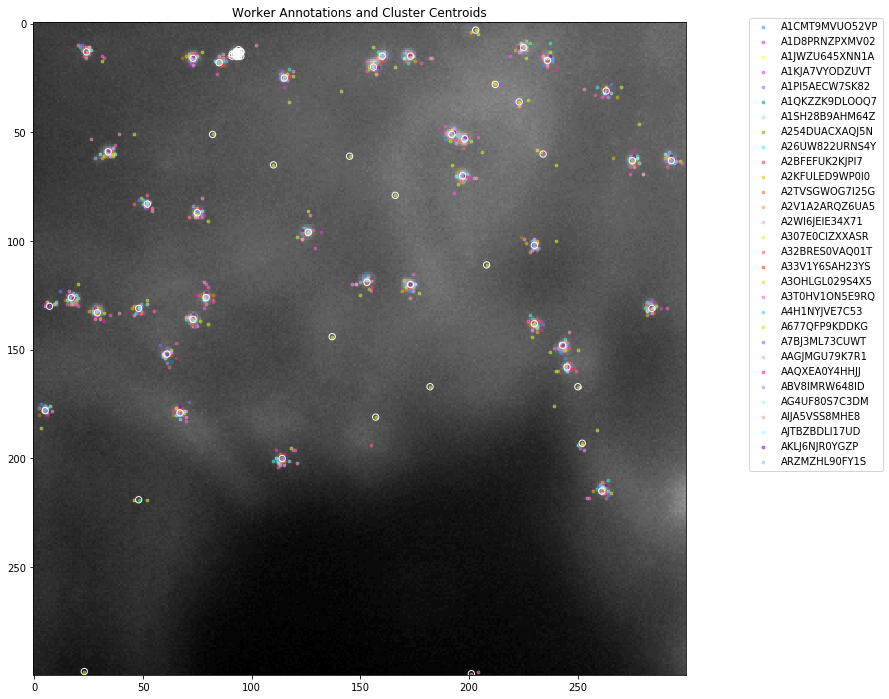

In [13]:
show_ref_points = False
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -400]
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

# Plot to investigate worker efficiency 
As another way to get a "quick look" at the dataset and provide some initial quality control if, for example, a lot of workers are clicking unusually quickly or slowly (for some definition of "unusual"), we can the average time spent per click for all workers in the QuantiusAnnotation object.

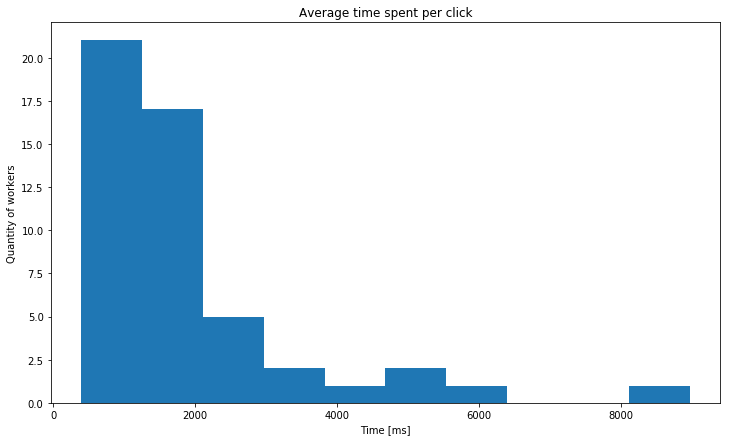

In [14]:
bigger_window_size = False
sa.plot_avg_time_per_click(anno_all, bigger_window_size)
bigger_window_size = True

#### Takeaways:
Most workers tend to click quickly on average. (We would potentially lose a lot of data, trying to screen on click speed.)

# Plot to investigate accuracy and speed.
Across clicks, investigate the relationship between accuracy (measured as distance from the click to the nearest neighbor) and speed (measured as the difference between the click's timestamp and the previous click's timestamp).

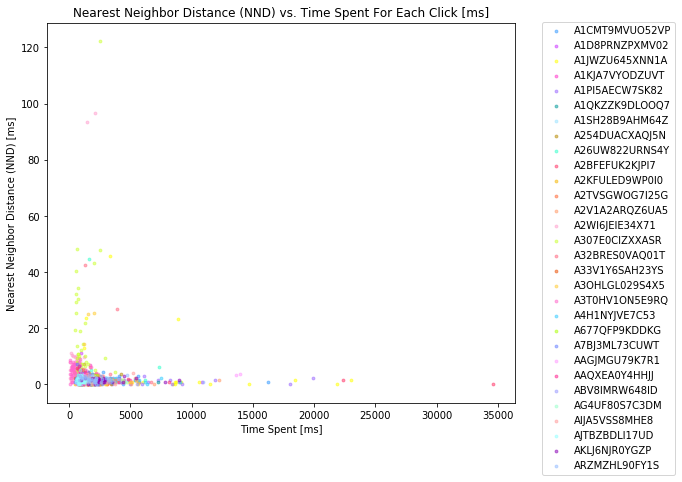

In [15]:
show_correctness = False
correctness_threshold = None
clustering_params = None
sa.plot_nnd_vs_time_spent(anno_all, img_filename, csv_filename, show_correctness, correctness_threshold, clustering_params)

#### Takeaways:

Up until about 2.5 seconds, for any amount of time spent, there are still points far from near neighbors.

Workers who tend to take more time tend to have smaller NNDs.

#### Color each point (each click) according to the correctness of the cluster of which it is a member:

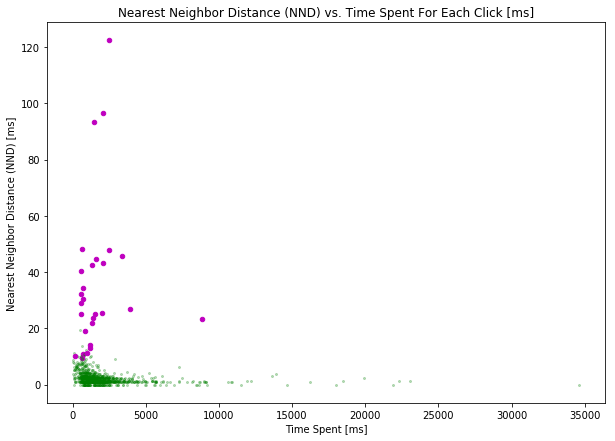

In [16]:
show_correctness = True
correctness_threshold = 4
clustering_params = ['AffinityPropagation', -350]
sa.plot_nnd_vs_time_spent(anno_all, img_filename, csv_filename, show_correctness, correctness_threshold, clustering_params)

#### Takeaways:

Some clicks that get associated with incorrect clusters are actually close to reference points.  So some clicks that are quite “good” are being pulled into clusters that are bad. I think we can see this happening in Example 3.1, second image, near (70,150).


# Plot to compare accuracy between workers.
Compare accuracy (measured as distance from the click to the nearest neighbor) between different workers in a dataframe.

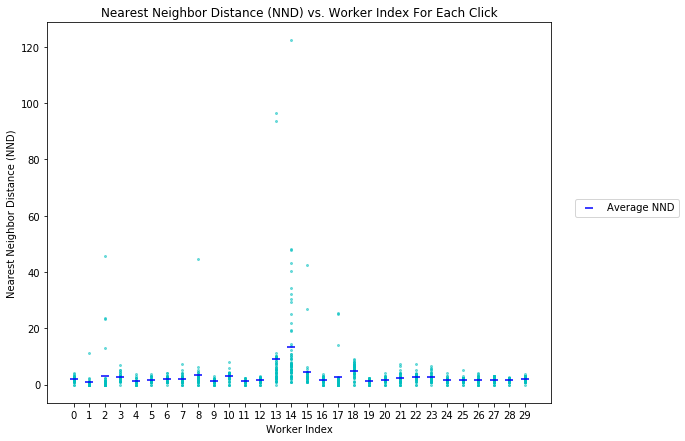

In [17]:
show_correctness = False
correctness_threshold = None
clustering_params = None
show_avgs = True
sa.plot_nnd_vs_worker_index(anno_all, img_filename, csv_filename, show_correctness, correctness_threshold, clustering_params, show_avgs)

#### Takeaways:

While most workers produce some clicks that are quite far from any reference points (in Example 2, the points most loosely associated with any clusters (“floating in space”) seem to come in all colors), some workers are markedly less accurate (e.g. 13, 19, maybe 5).

#### Color each point (each click) according to the correctness of the cluster of which it is a member:

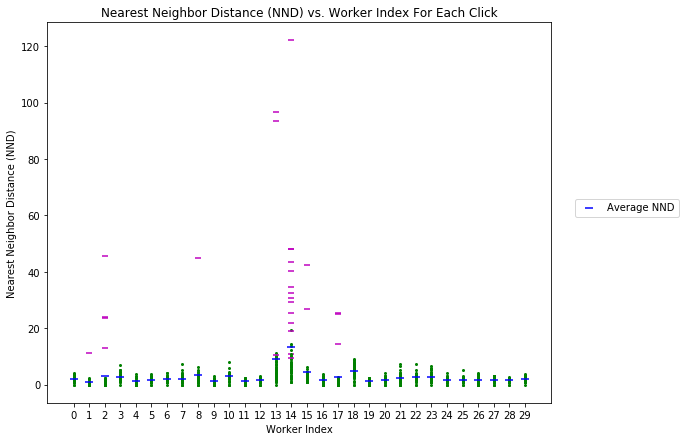

In [18]:
show_correctness = True
correctness_threshold = 4
clustering_params = ['AffinityPropagation', -350]
show_avgs = True
sa.plot_nnd_vs_worker_index(anno_all, img_filename, csv_filename, show_correctness, correctness_threshold, clustering_params, show_avgs)

#### Takeaways:

Some workers’ pretty-good clicks are getting associated with incorrect clusters (i.e. pink markers found among green markers). This issue more severely affects workers who are less accurate (e.g. 5 and 13), although it also affects workers who are very accurate, including 6 and 15.

# Plot to compare speed between workers.
Compare speed (measured as the difference between the click's timestamp and the previous click's timestamp) between different workers in a dataframe.

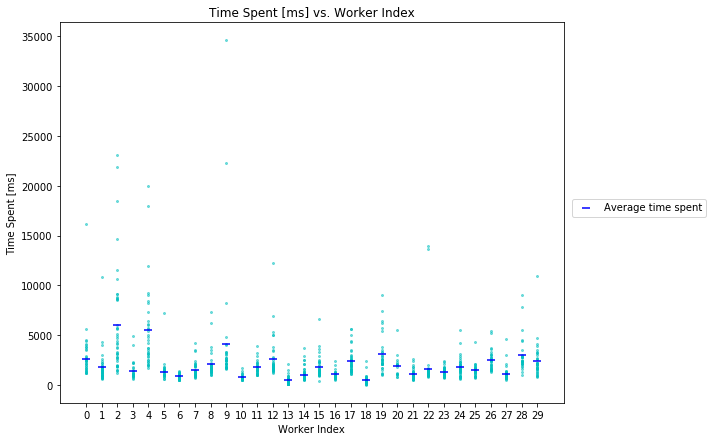

In [19]:
show_correctness = False
correctness_threshold = None
clustering_params = None
show_avgs = True
sa.plot_time_spent_vs_worker_index(anno_all, img_filename, csv_filename, show_correctness, correctness_threshold, clustering_params, show_avgs)

#### Takeaways:

While about a third of the workers have several clicks that take more than 20 seconds, some workers show more of a spread in terms of time spent per click (e.g. 3, 16), and some workers whiz through all their clicks and don’t take a long time on any of them.

I can think of two reasons a click might take an unusually long time:
 - The worker is taking a break from the task.
 - The worker has finished a quick first pass and is now combing through for missed spots.  

The examples shown under the header “Plot to investigate the evolution of a worker's speed” (further along in this notebook) do not seem to support the second possible reason.

#### Color each point (each click) according to the correctness of the cluster of which it is a member:

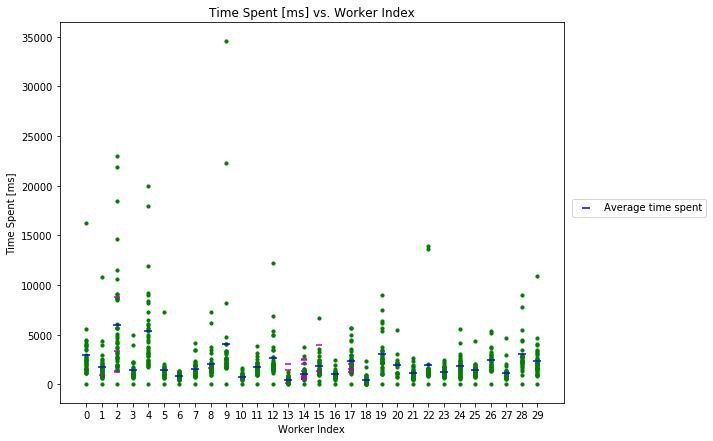

In [20]:
show_correctness = True
correctness_threshold = 4
clustering_params = ['AffinityPropagation', -350]
show_avgs = True
sa.plot_time_spent_vs_worker_index(anno_all, img_filename, csv_filename, show_correctness, correctness_threshold, clustering_params, show_avgs)

#### Takeaways:

For all workers, no clicks that take longer than about 8 seconds are incorrect. Some workers tend to be incorrect when they are clicking more quickly than their average (e.g. 15, 17, 18) while other workers do not follow any discernible pattern with regard to accuracy and time taken to click (e.g. 2, 6).

# Plot to investigate the total time each worker spends.
For each worker, plot total time spent (defined as the difference between the max timestamp and the min timestamp) vs. worker index. Each bar represents one worker.

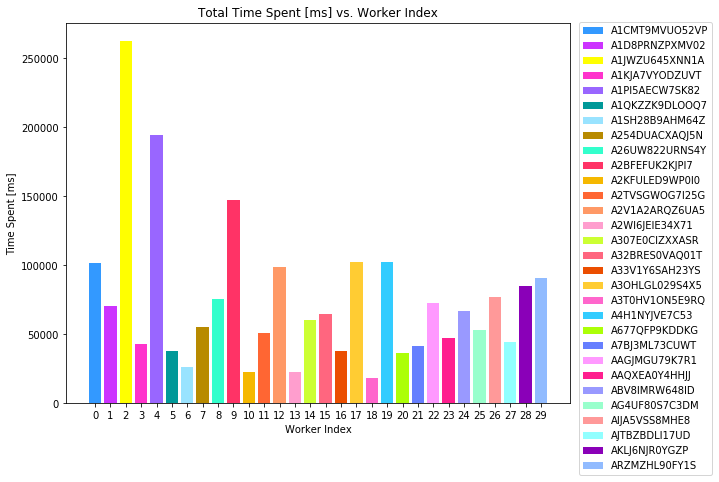

In [22]:
sa.plot_total_time_vs_worker_index(anno_all, img_filename)

#### Takeaways:
The amount of time workers spend in one sitting is highly variable.